# Predicting churn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./Telecom_customer churn.csv')

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,S,1.0,M,4.0,3.0,C,A,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,NaN,7.0,6.0,WC,1.0,1.0,NaN,1.0,S,S,1.0,M,5.0,1.0,C,A,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.98999,2.0,1.0,NaN,0.0,0.0,O,7.0,S,M,2.0,M,5.0,2.0,C,A,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.98999,1.0,1.0,NaN,0.0,0.0,NaN,6.0,M,M,4.0,M,6.0,1.0,C,D,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.98999,6.0,4.0,WCMB,0.0,0.0,R,5.0,M,S,1.0,M,6.0,1.0,C,O,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [3]:
df.columns

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months',
       'uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'asl_flag', 'totcalls',
       'totmou', 'totrev', 'adjrev'

In [4]:
df.shape

(100000, 100)

In [5]:
df['churn'].head()

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

In [6]:
df.describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
count,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99109.000000,99109.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,97161.000000,97161.000000,97161.000000,99153.000000,99999.000000,99999.000000,98268.000000,98268.000000,69810.000000,76981.000000,74564.000000,50634.000000,98268.000000,99999.000000,1.000000e+05
mean,58.719985,513.559937,46.179136,0.888828,41.072247,13.559560,13.295062,0.261318,1.286405,-13.933818,-1.021067,5.955085,0.040520,4.022917,0.025777,27.784905,0.029810,144.881677,0.870548,55.085152,0.047590,108.892535,0.774442,1.790838,4.666880,3.683328,29.766550,0.284720,227.763520,1.844036,111.654562,24.753320,28.467865,7.894360,18.193037,88.480285,0.358162,174.080788,0.707832,66.003498,0.416283,165.280703,1.135804,10.044298,145.752225,109.666977,0.011700,1.782928,0.495620,18.833990,1.548140,1.358960,2877.141930,7648.363833,1031.924988,960.111529,7546.314699,2836.366920,57.913832,483.726493,173.554507,519.641210,180.337320,59.193330,509.634576,178.365157,58.683618,101.875763,1.787118,1.545825,0.188820,0.082580,6.177238,2.530326,5.783112,1.567563,0.057974,391.932309,1.050000e+06
std,46.291677,525.168140,23.623489,2.177619,97.296150,30.500885,30.056089,3.126531,14.711374,276.087509,50.363209,8.954715,0.877136,10.672202,1.490255,38.358734,0.496970,158.267711,9.053901,86.841198,2.127422,118.580079,8.129844,5.315570,12.761953,10.539981,55.833753,1.092101,264.403894,23.733226,162.691285,34.414822,48.962903,16.145590,41.421462,103.066103,4.065630,207.673553,8.410151,91.456885,4.652627,237.332918,17.768683,15.418406,159.348094,119.594305,0.547470,5.353953,0.499983,9.655794,1.075255,0.655555,3790.863474,8666.558293,852.907511,840.170815,8594.889729,3756.513882,36.161292,438.485213,167.824576,533.634073,192.725835,46.695429,496.663453,182.724565,40.758577,61.005671,1.313977,0.898395,0.391368,0.275248,4.735267,1.452819,2.182132,0.625456,0.233696,256.482193,2.886766e+04
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

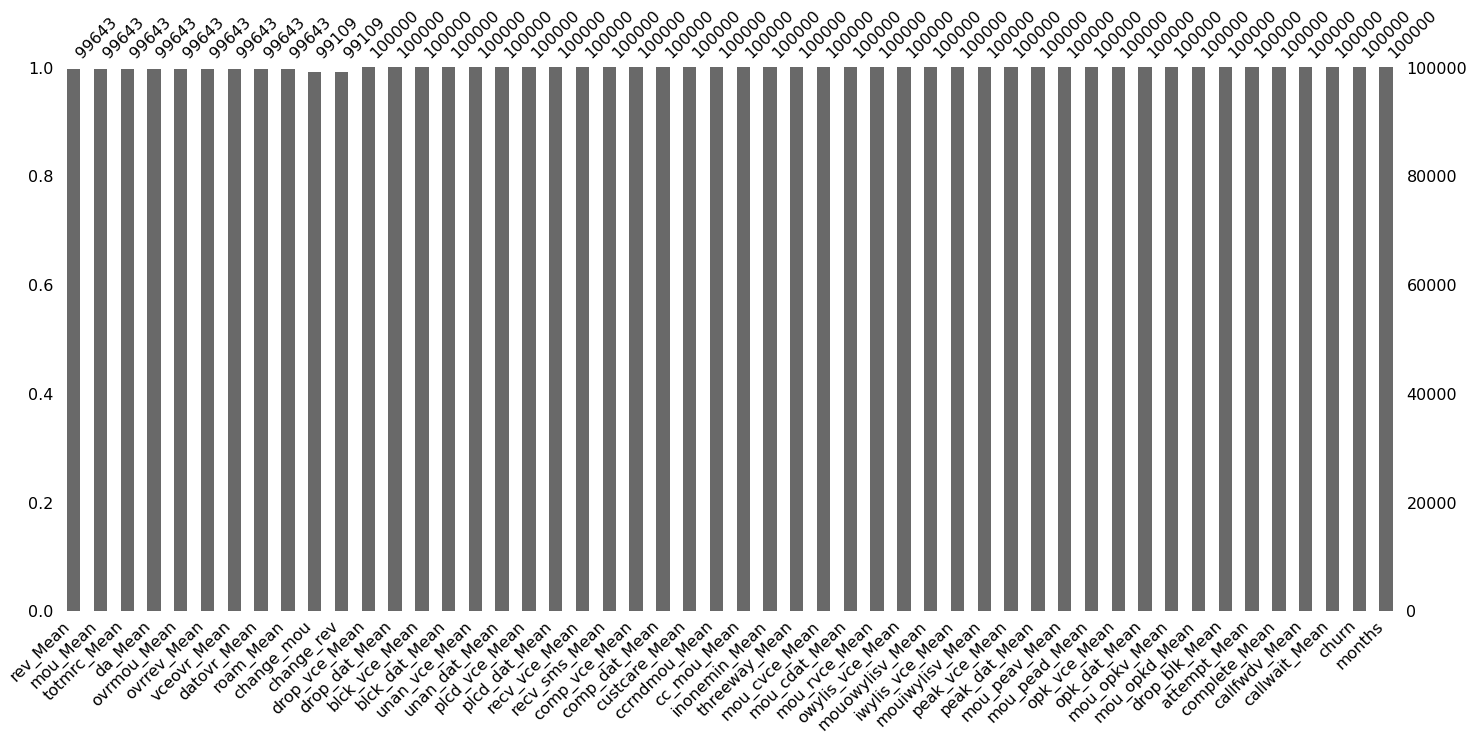

In [7]:
import missingno as msno
msno.bar(df.iloc[:, 0:50])

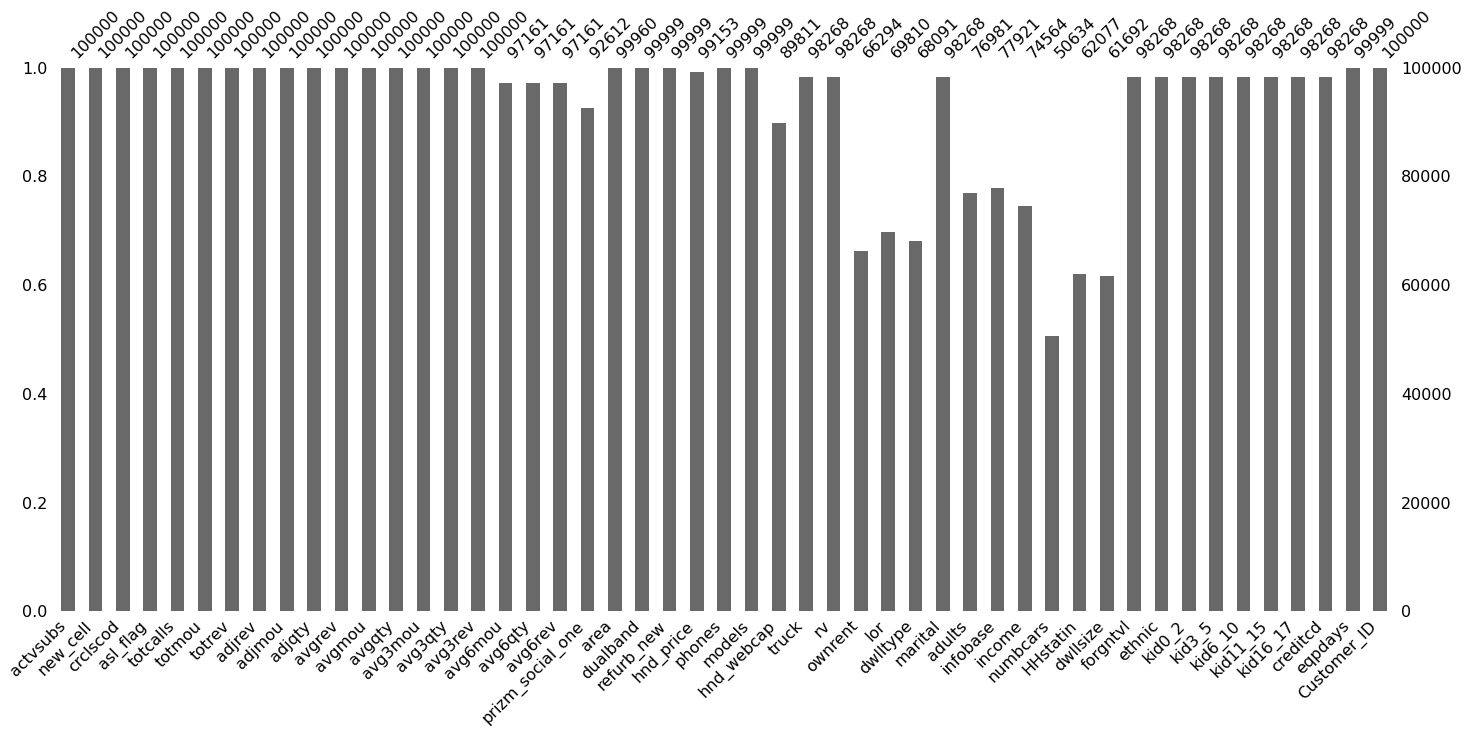

In [8]:
msno.bar(df.iloc[:, 51:])

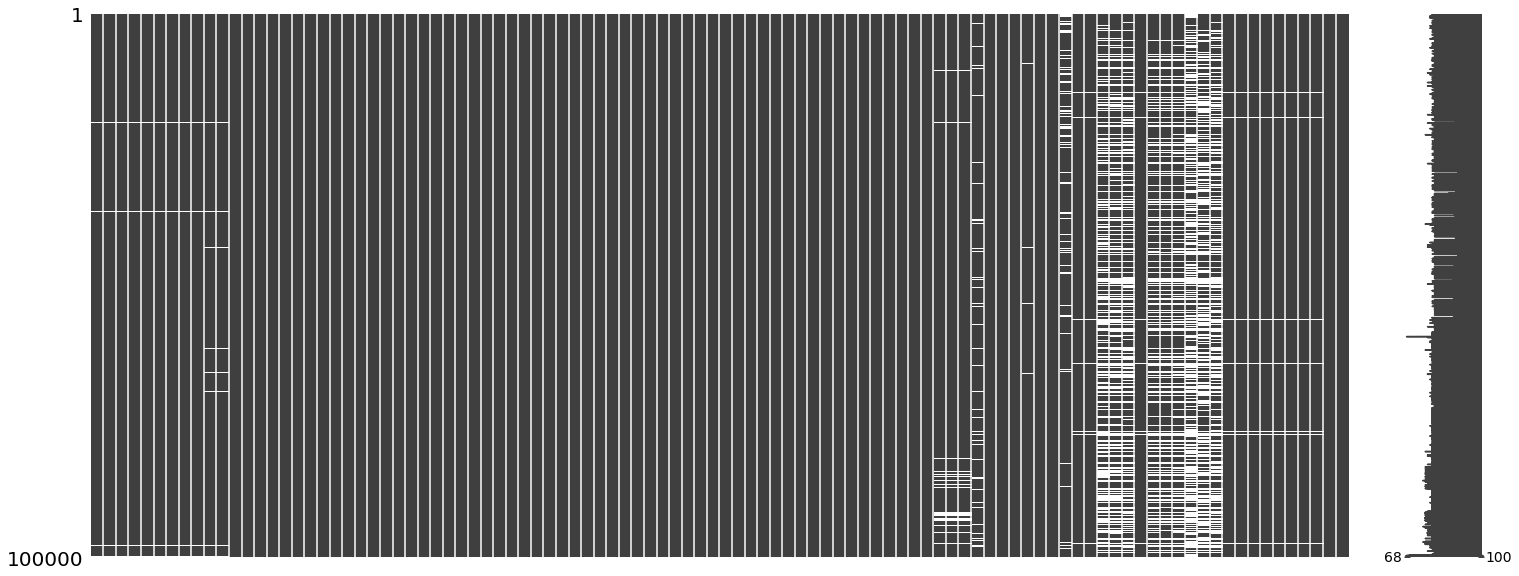

In [9]:
# msno.matrix(df.iloc[:, 65:])
msno.matrix(df)

In [10]:
columns = df.columns
df_null_ratio = list(np.mean(df.isnull()))
null_values = pd.DataFrame({'columns': columns, 'df_null_ratio': df_null_ratio})
null_values.head(1000)

,columns,df_null_ratio
0,rev_Mean,0.00357
1,mou_Mean,0.00357
2,totmrc_Mean,0.00357
3,da_Mean,0.00357
4,ovrmou_Mean,0.00357
5,ovrrev_Mean,0.00357
6,vceovr_Mean,0.00357
7,datovr_Mean,0.00357
8,roam_Mean,0.00357
9,change_mou,0.00891


**According to the graphs above, it seems like that the dataset does not have too many NaN values. I will start treating them based on their data type. For example, for categorical variables I will inpute `'unknown'`, and for numeric variables I will inpute the `mode`.**

In [11]:
def plot_bar(df, df_column, top_n = 20):
    #The function takes the name of the df and the name of the column as a 'sring'.
    print(f"missing: {round((df[df_column].isnull().mean()*100), 2)}%")
    cut_num = df[df_column].value_counts()[:top_n]
    chart = sns.barplot(x = cut_num.index, y = cut_num, data = df)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.show()

In [12]:
column_with_nan = list(null_values[null_values['df_null_ratio'] > 0]['columns'])
cat_null_cat_columns = df[column_with_nan].select_dtypes(include=['object']).columns

In [13]:
cat_null_cat_columns

Index(['prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap',
       'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize',
       'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17',
       'creditcd'],
      dtype='object')

In [14]:
for column in cat_null_cat_columns:
    df[column] = df[column].fillna('Unknown')

missing: 0.0%


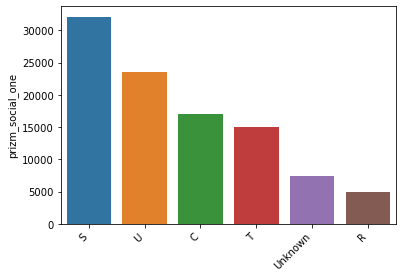

missing: 0.0%


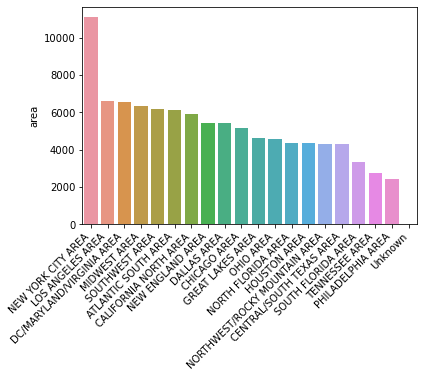

missing: 0.0%


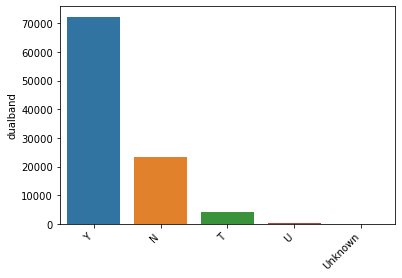

missing: 0.0%


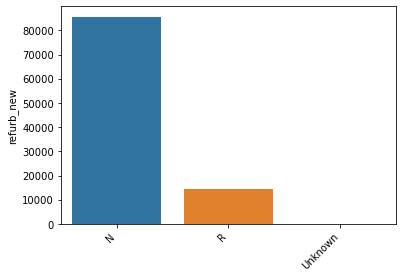

missing: 0.0%


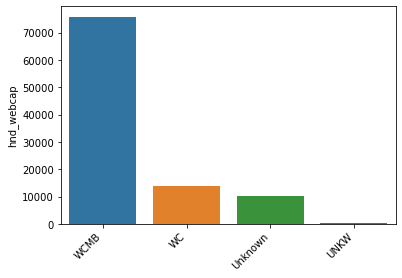

missing: 0.0%


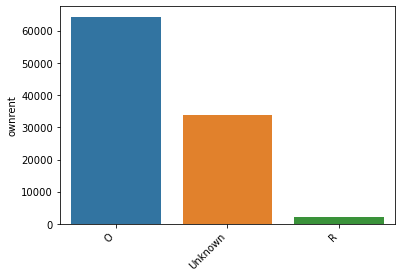

missing: 0.0%


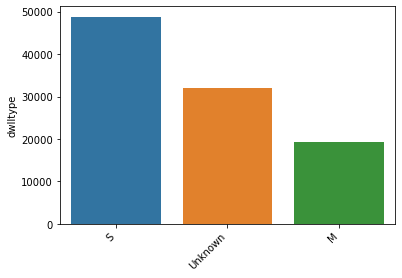

missing: 0.0%


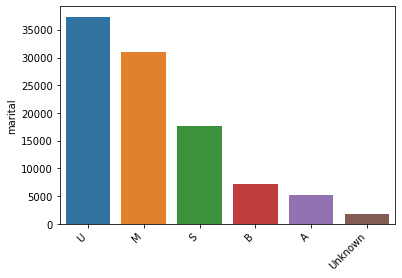

missing: 0.0%


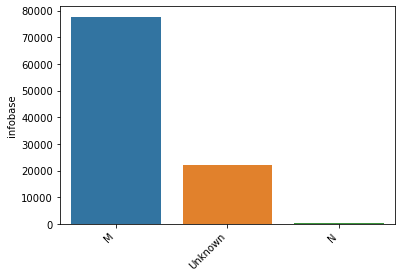

missing: 0.0%


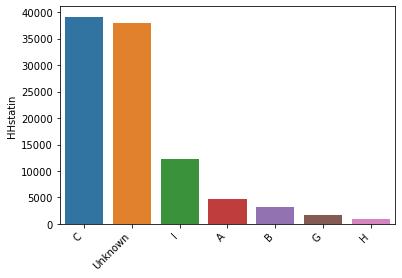

missing: 0.0%


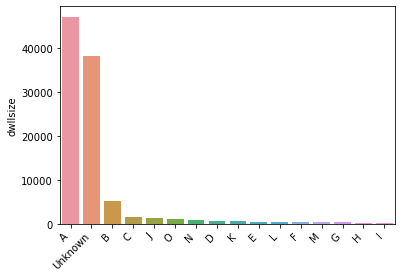

missing: 0.0%


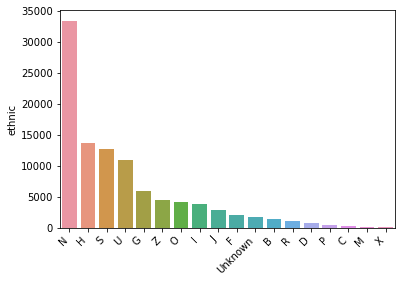

missing: 0.0%


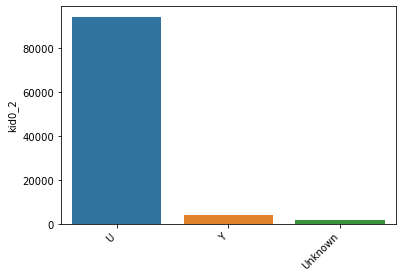

missing: 0.0%


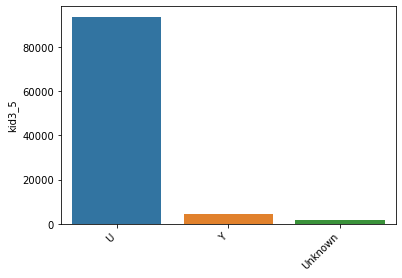

missing: 0.0%


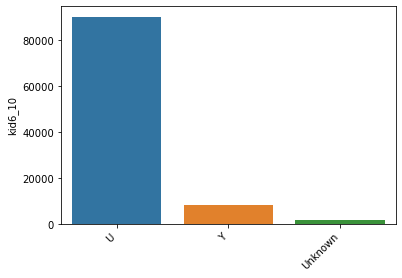

missing: 0.0%


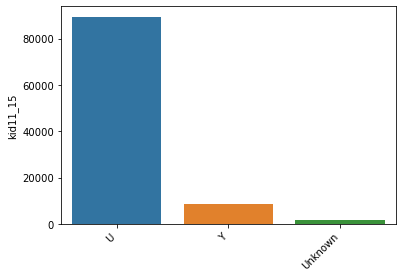

missing: 0.0%


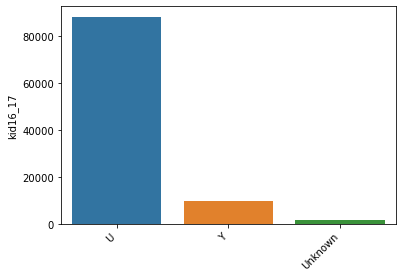

missing: 0.0%


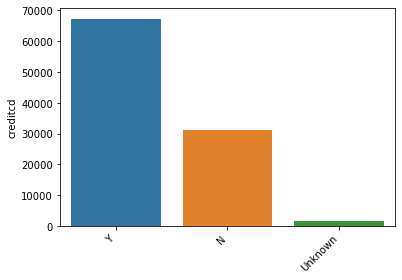

In [15]:
for column in cat_null_cat_columns:
    plot_bar(df, df_column = column)

In [16]:
columns = df.columns
df_null_ratio = list(np.mean(df.isnull()))
null_values = pd.DataFrame({'columns': columns, 'df_null_ratio': df_null_ratio})
column_with_nan = list(null_values[null_values['df_null_ratio'] > 0]['columns'])
df[column_with_nan].head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,322.0,136.0,38.0,149.98999,2.0,2.0,0.0,0.0,15.0,1.0,4.0,3.0,0.0,361.0
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,477.0,275.0,48.0,NaN,7.0,6.0,1.0,1.0,1.0,1.0,5.0,1.0,0.0,240.0
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,11.0,6.0,17.0,29.98999,2.0,1.0,0.0,0.0,7.0,2.0,5.0,2.0,0.0,1504.0
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,50.0,25.0,40.0,29.98999,1.0,1.0,0.0,0.0,6.0,4.0,6.0,1.0,0.0,1812.0
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,586.0,196.0,80.0,149.98999,6.0,4.0,0.0,0.0,5.0,1.0,6.0,1.0,0.0,434.0


rev_Mean


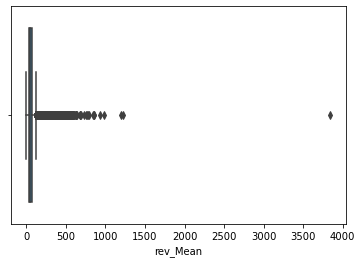

mou_Mean


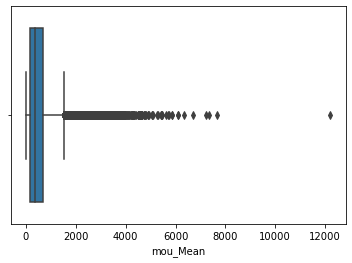

totmrc_Mean


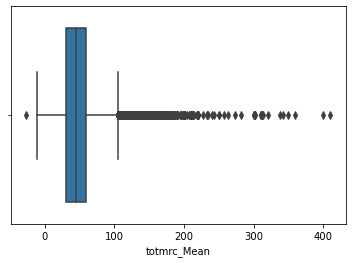

da_Mean


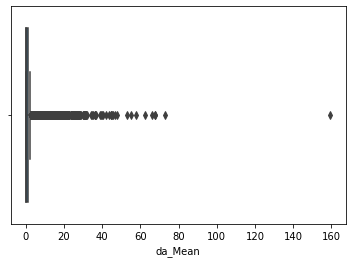

ovrmou_Mean


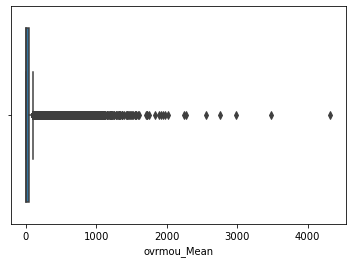

ovrrev_Mean


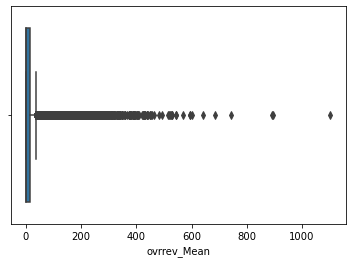

vceovr_Mean


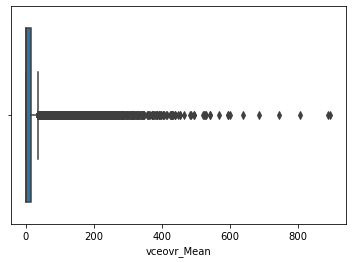

datovr_Mean


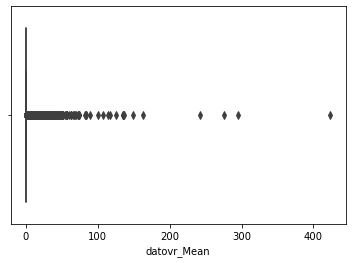

roam_Mean


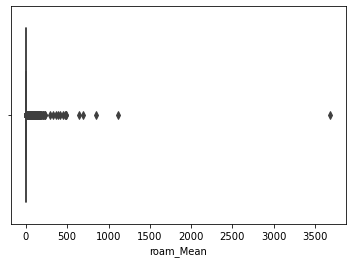

change_mou


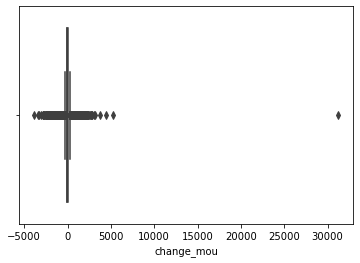

change_rev


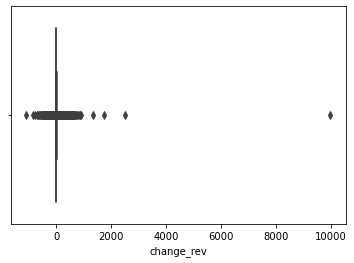

avg6mou


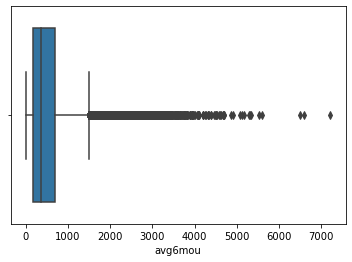

avg6qty


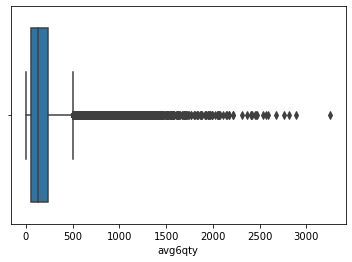

avg6rev


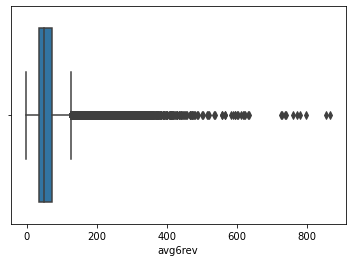

hnd_price


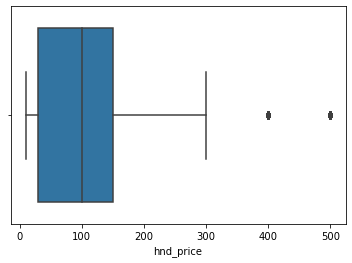

phones


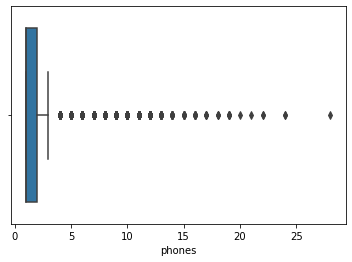

models


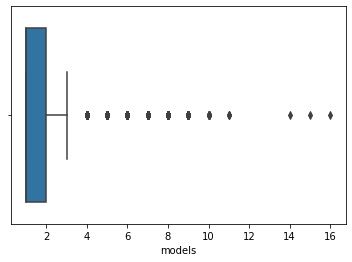

truck


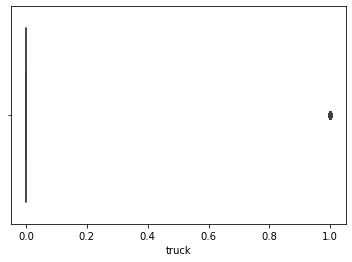

rv


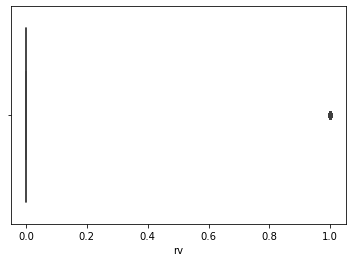

lor


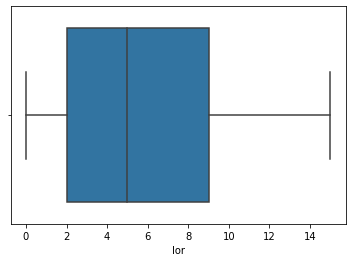

adults


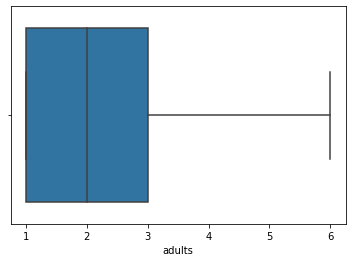

income


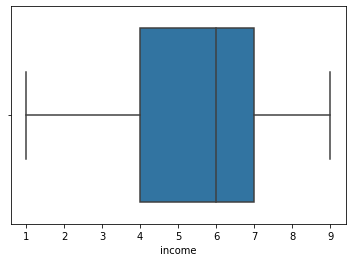

numbcars


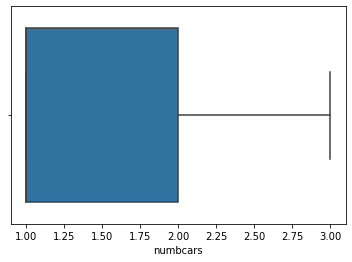

forgntvl


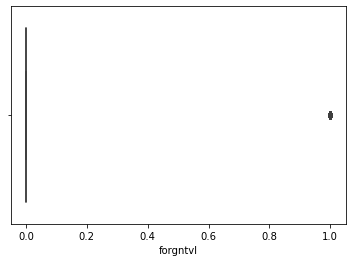

eqpdays


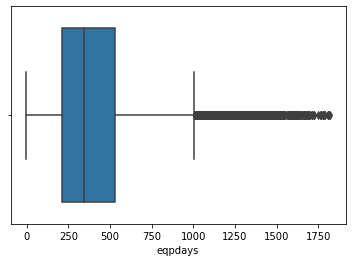

In [17]:
for column in list(df[column_with_nan].columns):
    print(column)
    sns.boxplot(x=df[column])
    plt.show()

**According to the barcharts, the dataset is full of outliers. I will use Z-score function defined in scipy library to detect the outliers. The reason of my choice is the fact that Z-score is widely used for this reason and it has proven itself useful in such cases.**

In [18]:
for column in column_with_nan:
    df[column] = df[column].fillna(int(df[column].mode()))

In [19]:
from scipy import stats
z = np.abs(stats.zscore(df[column_with_nan]))
print(z)

[[0.74858009 0.55696943 1.00380944 ... 3.24471172 0.24578782 0.12060012]
 [0.02424996 0.05518063 0.37089868 ... 0.54446711 0.24578782 0.59237224]
 [0.90011743 0.95497269 1.23746695 ... 1.35012231 0.24578782 4.33589191]
 ...
 [0.64040092 0.97449199 0.0920787  ... 0.54446711 0.24578782 0.16012379]
 [0.64040092 0.97449199 0.0920787  ... 0.54446711 0.24578782 1.23569786]
 [0.64040092 0.97449199 0.0920787  ... 0.54446711 0.24578782 1.50862389]]


In [20]:
threshold = 3
print(np.where(z > 3))

(array([    0,     1,     1, ..., 99994, 99998, 99998], dtype=int64), array([22, 15, 16, ..., 13, 15, 16], dtype=int64))


In [21]:
Q1 = df[column_with_nan].quantile(0.25)
Q3 = df[column_with_nan].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

rev_Mean        37.390000
mou_Mean       552.500000
totmrc_Mean     29.990000
da_Mean          0.742500
ovrmou_Mean     42.000000
ovrrev_Mean     14.350000
vceovr_Mean     13.950000
datovr_Mean      0.000000
roam_Mean        0.235000
change_mou     147.750000
change_rev       8.748125
avg6mou        535.000000
avg6qty        178.000000
avg6rev         37.000000
hnd_price      120.000000
phones           1.000000
models           1.000000
truck            0.000000
rv               0.000000
lor              6.000000
adults           1.000000
income           2.000000
numbcars         1.000000
forgntvl         0.000000
eqpdays        318.000000
dtype: float64


In [22]:
df[column_with_nan] = df[column_with_nan][(z < 3).all(axis=1)]

In [23]:
for column in column_with_nan:
    df[column] = df[column].fillna(int(df[column].mode()))

In [24]:
df.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,29.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,0.0,0.0,31.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.0,1.0,1.0,WCMB,0.0,0.0,O,1.0,S,S,2.0,M,6.0,1.0,C,A,0.0,N,U,U,U,U,U,Y,310.0,1000001
1,29.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,0.0,0.0,31.0,U,CHICAGO AREA,N,N,149.0,1.0,1.0,WC,0.0,0.0,Unknown,1.0,S,S,2.0,M,6.0,1.0,C,A,0.0,Z,U,U,U,U,U,Y,310.0,1000002
2,29.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,0.0,0.0,31.0,S,GREAT LAKES AREA,N,N,149.0,1.0,1.0,Unknown,0.0,0.0,O,1.0,S,M,2.0,M,6.0,1.0,C,A,0.0,N,U,Y,U,U,U,Y,310.0,1000003
3,29.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,0.0,0.0,31.0,T,CHICAGO AREA,N,N,149.0,1.0,1.0,Unknown,0.0,0.0,Unknown,1.0,M,M,2.0,M,6.0,1.0,C,D,0.0,U,Y,U,U,U,U,Y,310.0,1000004
4,29.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,0.0,0.0,31.0,U,NEW ENGLAND AREA,Y,N,149.0,1.0,1.0,WCMB,0.0,0.0,R,1.0,M,S,2.0,M,6.0,1.0,C,O,0.0,I,U,U,U,U,U,Y,310.0,1000005


In [25]:
df.to_csv('Telecom_customer churn cleaned.csv', index = False)